In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
with open("/Users/weilu/Research/server/jan_2020/cath_dataset_shuffle_optimization/optimization_iter0/protein_list") as f:
    a = f.readlines()
b = [i.strip() for i in a]


In [7]:
import glob
a_list = glob.glob("/Users/weilu/Research/server/jan_2020/energy_evaluations_and_database_survey/my_CATH_database/*.pdb")

In [8]:
len(a_list)

911

In [55]:
letters = {'ALA':'A','ARG':'R','ASN':'N','ASP':'D','CYS':'C','GLU':'E','GLN':'Q','GLY':'G','HIS':'H',
           'ILE':'I','LEU':'L','LYS':'K','MET':'M','PHE':'F','PRO':'P','SER':'S','THR':'T','TRP':'W',
           'TYR':'Y','VAL':'V'}

In [73]:
np.arange(100, 950, 100)

array([100, 200, 300, 400, 500, 600, 700, 800, 900])

In [59]:
def calculate_specific_res_cb_density(res_list, neighbor_list, res_name, min_seq_sep=2):
    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            if res2.get_resname() != res_name:
                continue
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):
                rij = get_interaction_distance(res1, res2)
                density[res1globalindex] += interaction_well(rij, 4.5, 6.5, 5)
    return density


In [60]:
res_name = "ALA"
info = []
parser = PDBParser()
all_freq = np.zeros(100)
for i, a in enumerate(a_list):
    pdb = a.split("/")[-1].split(".")[0]
    structure = parser.get_structure("x", a)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    # sequence = get_sequence_from_structure(structure)
    cb_density = calculate_specific_res_cb_density(res_list, neighbor_list, res_name, min_seq_sep=2)
#     info.append([pdb, cb_density])
    cb_density = np.clip(cb_density, 0, 10)
    freq, bins = np.histogram(cb_density, bins=100, range=(0,10))
    all_freq += freq
#     if i == 100:
#         break

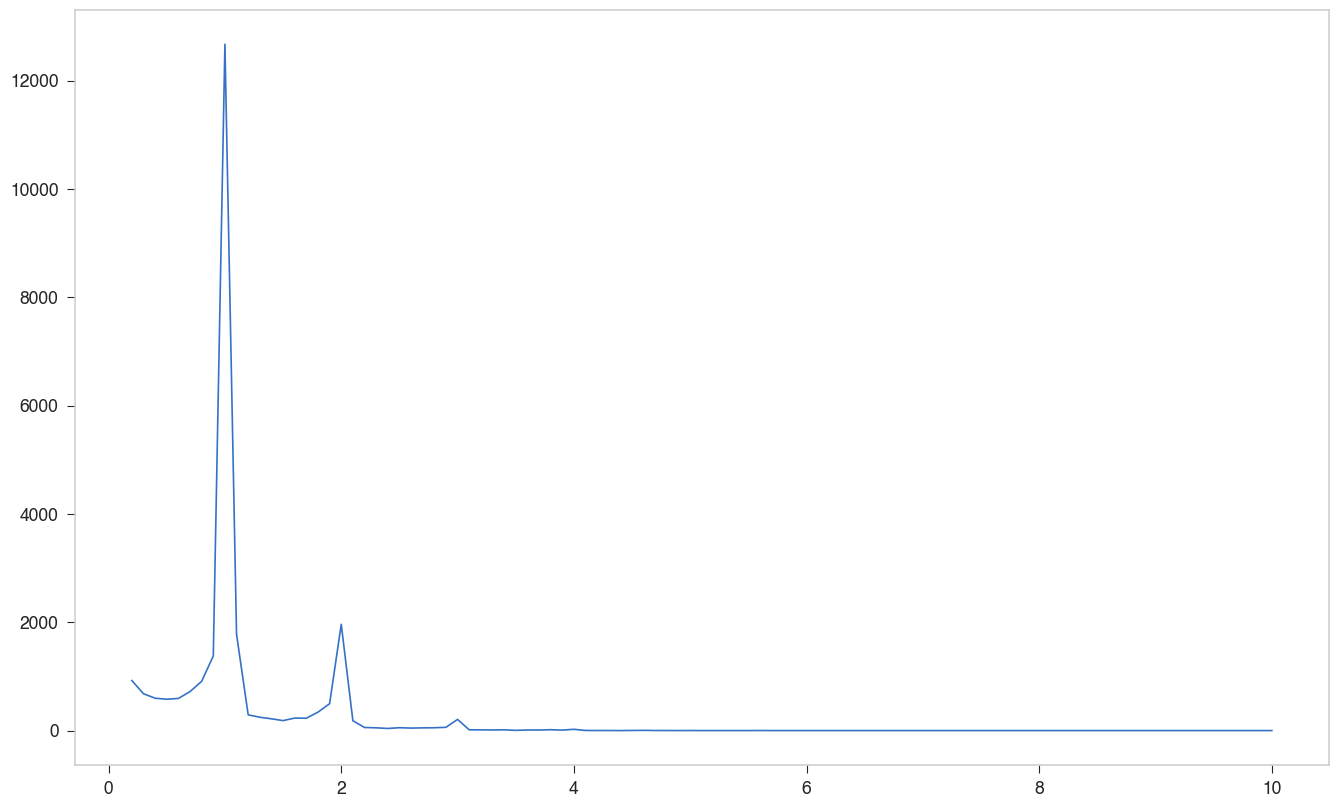

In [65]:
ALA_all_freq = all_freq
ALA_cb_bins = bins
# plt.plot(ALA_cb_bins[1:], ALA_all_freq)
plt.plot(ALA_cb_bins[2:], ALA_all_freq[1:])
# plt.xlim(0,5)

In [47]:
info = []
parser = PDBParser()
all_freq = np.zeros(100)
for i, a in enumerate(a_list):
    pdb = a.split("/")[-1].split(".")[0]
    structure = parser.get_structure("x", a)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    # sequence = get_sequence_from_structure(structure)
    cb_density = calculate_cb_density(res_list, neighbor_list, min_seq_sep=5)
#     info.append([pdb, cb_density])
    cb_density = np.clip(cb_density, 0, 10)
    freq, bins = np.histogram(cb_density, bins=100, range=(0,10))
    all_freq += freq
#     if i == 100:
#         break

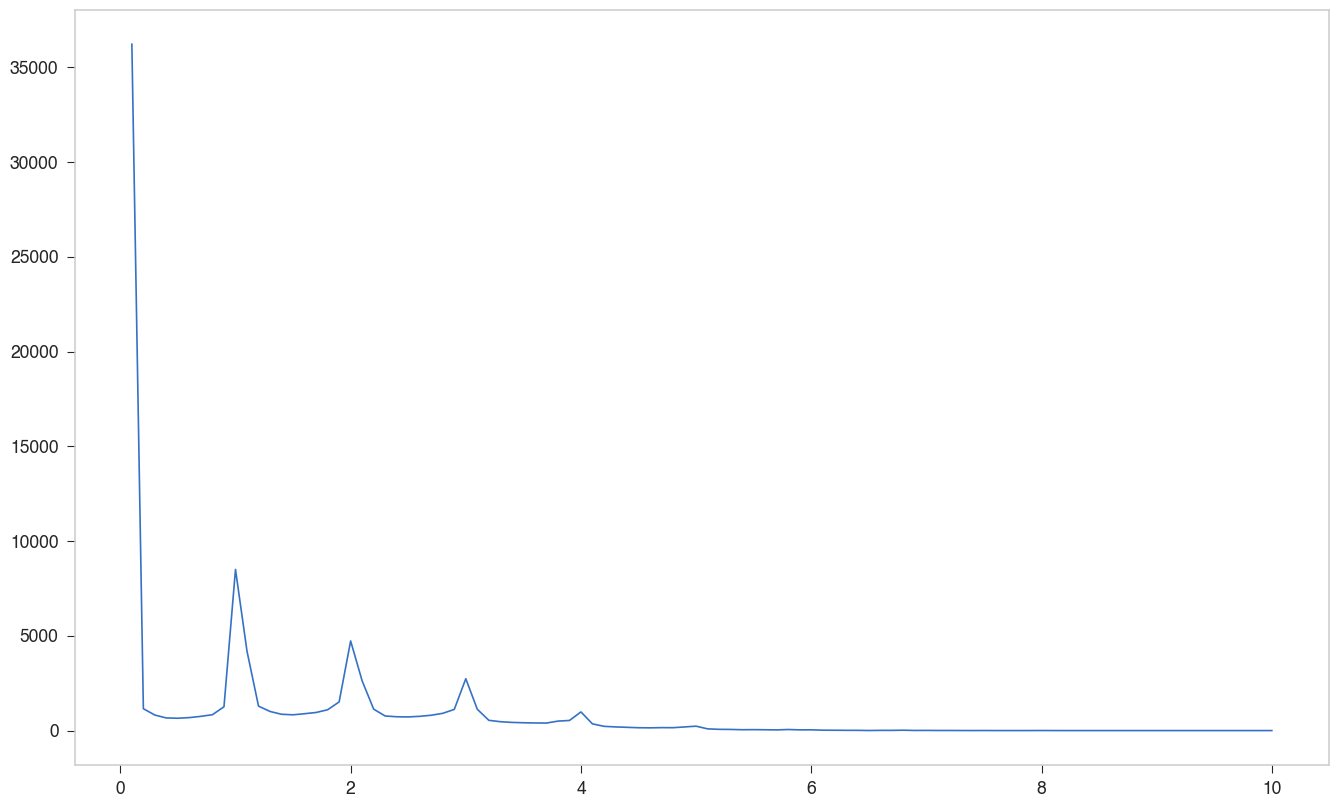

In [48]:
cb_all_freq_5 = all_freq
cb_bins_5 = bins
plt.plot(cb_bins_5[1:], cb_all_freq_5)
# plt.xlim(0,5)

In [49]:
cb_all_freq_5

array([3.6221e+04, 1.1530e+03, 8.1800e+02, 6.6500e+02, 6.5000e+02,
       6.8500e+02, 7.5100e+02, 8.3800e+02, 1.2560e+03, 8.5030e+03,
       4.1870e+03, 1.2890e+03, 1.0080e+03, 8.6000e+02, 8.3200e+02,
       8.9000e+02, 9.5400e+02, 1.0980e+03, 1.5120e+03, 4.7290e+03,
       2.6200e+03, 1.1310e+03, 7.6900e+02, 7.2900e+02, 7.2000e+02,
       7.5200e+02, 8.0900e+02, 9.1000e+02, 1.1170e+03, 2.7360e+03,
       1.1250e+03, 5.4100e+02, 4.6800e+02, 4.3100e+02, 4.1200e+02,
       4.0200e+02, 3.9600e+02, 4.9900e+02, 5.3300e+02, 9.8300e+02,
       3.5400e+02, 2.2400e+02, 1.9300e+02, 1.7100e+02, 1.5000e+02,
       1.4400e+02, 1.5500e+02, 1.5200e+02, 1.9200e+02, 2.3200e+02,
       9.0000e+01, 6.5000e+01, 6.0000e+01, 4.5000e+01, 4.9000e+01,
       4.3000e+01, 3.5000e+01, 5.6000e+01, 3.7000e+01, 4.0000e+01,
       2.0000e+01, 1.7000e+01, 1.3000e+01, 1.2000e+01, 3.0000e+00,
       1.1000e+01, 1.0000e+01, 1.9000e+01, 6.0000e+00, 9.0000e+00,
       5.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e

In [21]:
data = pd.DataFrame(info, columns=["Protein", "CB_density"])

In [27]:
pdb

'1lnwA01'

In [44]:
structure = parser.get_structure("x", a)
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)
# sequence = get_sequence_from_structure(structure)
cb_density = calculate_cb_density(res_list, neighbor_list, min_seq_sep=5)

In [45]:
cb_density[cb_density>5]

array([5.2590364])

In [46]:
keep_res = []
for res, larger_than_5 in zip(res_list, cb_density>5):
    if larger_than_5:
        keep_res.append(res)
keep_res

[<Residue LEU het=  resseq=95 icode= >]

In [38]:
keep_res = []
for res, larger_than_5 in zip(res_list, cb_density>6):
    if larger_than_5:
        keep_res.append(res)

In [40]:
keep_res

[<Residue HIS het=  resseq=105 icode= >]

In [37]:
cb_density[cb_density>5]

array([5.86371332, 5.78131243, 5.3421337 , 5.46939593, 5.50159703,
       5.85206336, 5.33396182, 5.25964448, 5.19438714, 5.00654652,
       5.83599955, 5.72115076, 6.46516883, 5.83249954, 5.58289744,
       5.8684185 ])

In [31]:
len(cb_density)

130

In [34]:
cb_density > 5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
np.histogram(cb_density, bins=100, range=(0,10))

(array([3, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 3, 0, 4, 2, 1, 3, 7, 7, 1,
        1, 2, 6, 4, 3, 4, 4, 3, 6, 1, 0, 2, 5, 2, 2, 4, 7, 3, 2, 1, 1, 1,
        1, 2, 2, 1, 5, 0, 1, 1, 1, 2, 1, 2, 0, 2, 5, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7

In [10]:
cb_all_freq = all_freq
cb_bins = bins

In [14]:
cb_all_freq

array([3.714e+03, 3.850e+02, 2.950e+02, 2.790e+02, 2.470e+02, 2.630e+02,
       2.780e+02, 3.410e+02, 4.820e+02, 2.678e+03, 2.968e+03, 1.077e+03,
       9.220e+02, 8.310e+02, 8.290e+02, 8.840e+02, 9.970e+02, 1.126e+03,
       1.691e+03, 4.594e+03, 3.119e+03, 1.551e+03, 1.375e+03, 1.185e+03,
       1.281e+03, 1.350e+03, 1.457e+03, 1.813e+03, 2.225e+03, 4.084e+03,
       2.552e+03, 1.784e+03, 1.525e+03, 1.513e+03, 1.414e+03, 1.472e+03,
       1.637e+03, 1.821e+03, 2.237e+03, 3.085e+03, 1.630e+03, 1.152e+03,
       1.146e+03, 1.053e+03, 1.032e+03, 1.103e+03, 1.164e+03, 1.221e+03,
       1.429e+03, 1.674e+03, 1.046e+03, 8.040e+02, 7.370e+02, 7.450e+02,
       7.620e+02, 7.200e+02, 7.110e+02, 7.930e+02, 8.430e+02, 9.400e+02,
       5.640e+02, 4.370e+02, 4.090e+02, 3.810e+02, 3.700e+02, 3.620e+02,
       3.570e+02, 3.980e+02, 3.910e+02, 3.410e+02, 1.790e+02, 1.710e+02,
       1.440e+02, 1.100e+02, 1.270e+02, 1.130e+02, 9.600e+01, 1.210e+02,
       9.600e+01, 9.700e+01, 4.500e+01, 3.400e+01, 

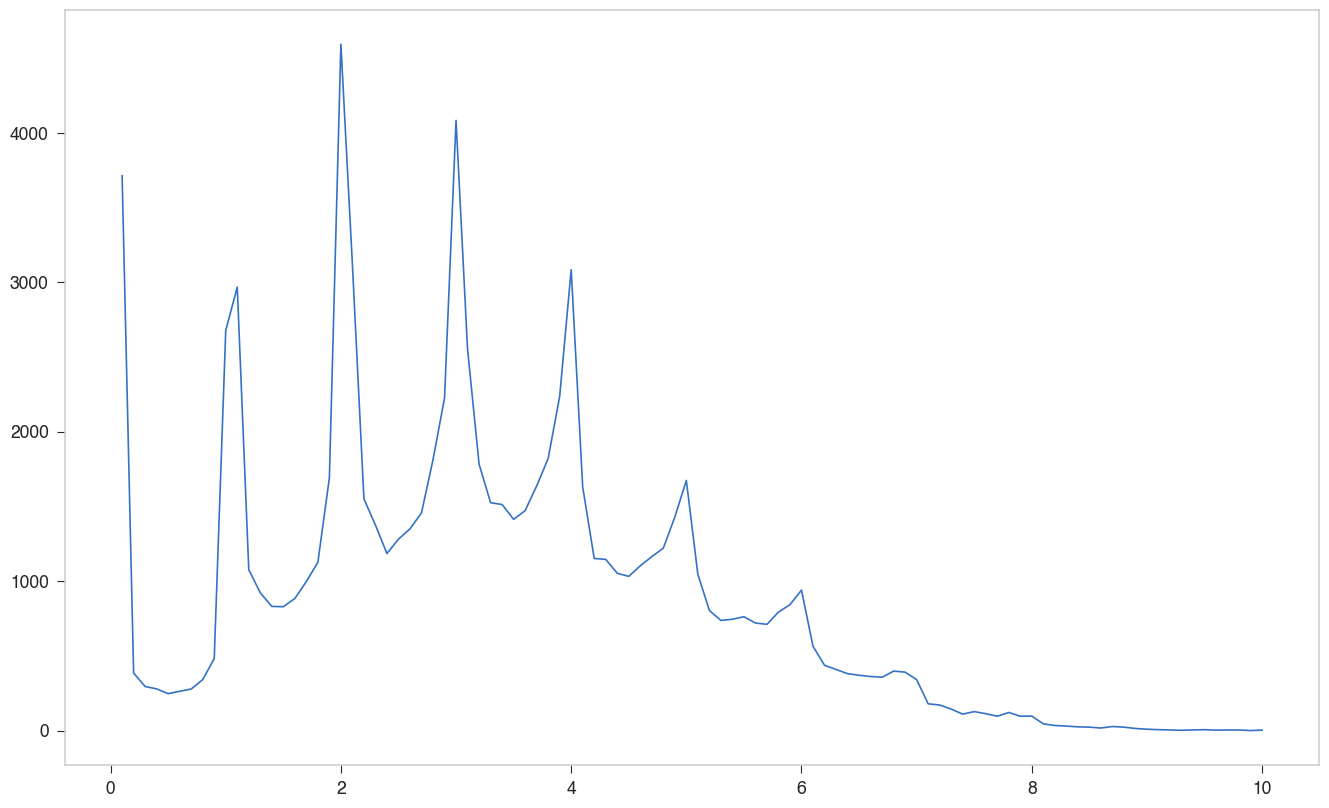

In [12]:
plt.plot(cb_bins[1:], cb_all_freq)
# plt.xlim(0,5)

(0, 5)

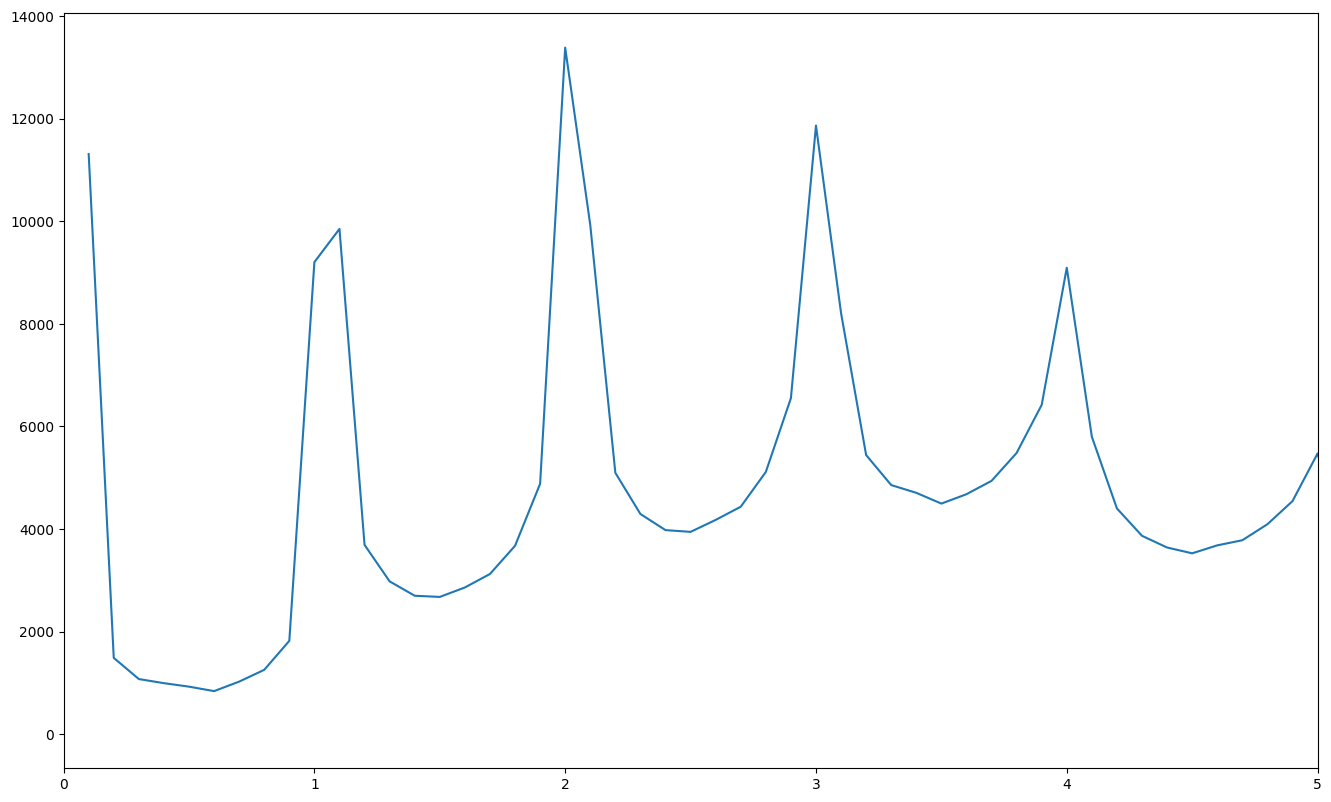

In [80]:
plt.plot(cb_bins[1:], cb_all_freq)
plt.xlim(0,5)

In [73]:
parser = PDBParser()
largest = 20
all_freq = np.zeros(largest*10)
for i, a in enumerate(a_list):
    structure = parser.get_structure("x", a)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    # sequence = get_sequence_from_structure(structure)
    cb_density = calculate_cb_weight_density(res_list, neighbor_list)
    cb_density = np.clip(cb_density, 0, largest)
    freq, bins = np.histogram(cb_density, bins=largest*10, range=(0,largest))
    all_freq += freq
#     if i == 10:
#         break

In [74]:
weight_all_freq = all_freq
weight_bins = bins

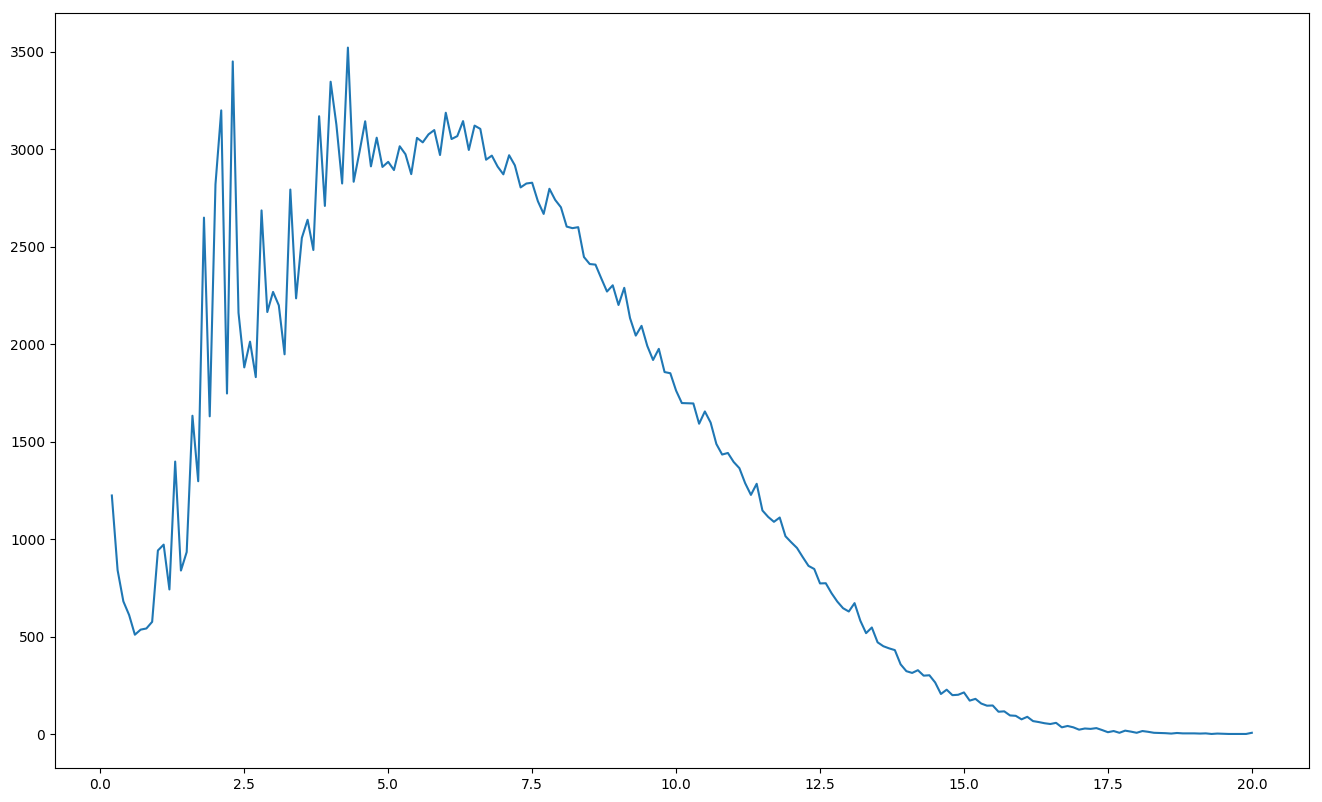

In [81]:
plt.plot(weight_bins[2:], weight_all_freq[1:])


(2, 4)

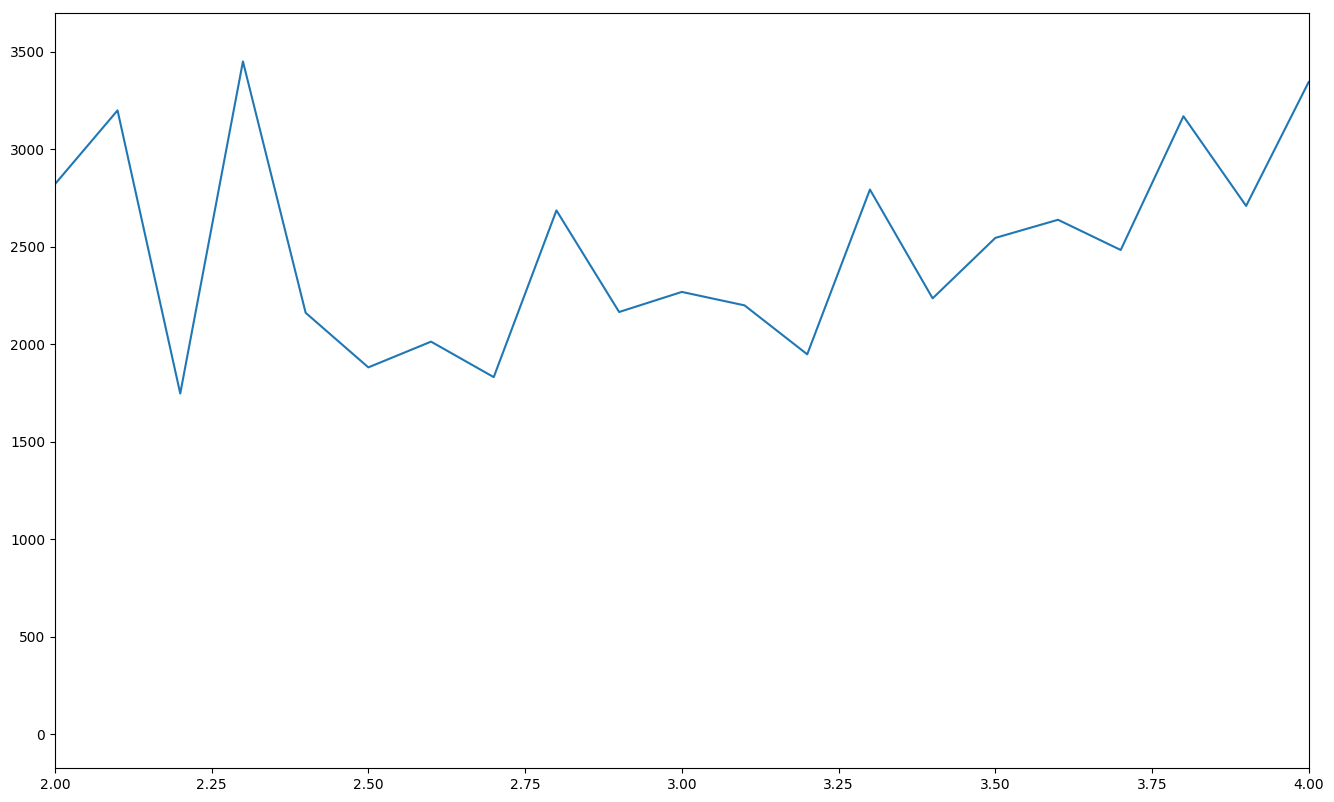

In [83]:
plt.plot(weight_bins[2:], weight_all_freq[1:])
plt.xlim(2,4)

In [10]:
parser = PDBParser()
largest = 600
all_freq = np.zeros(200)
for i, a in enumerate(a_list):
    structure = parser.get_structure("x", a)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    # sequence = get_sequence_from_structure(structure)
    cb_density = calculate_cb_weight_density_2(res_list, neighbor_list)
    cb_density = np.clip(cb_density, 0, largest)
    freq, bins = np.histogram(cb_density, bins=200, range=(0,largest))
    all_freq += freq
    if i == 100:
        break

In [11]:
weight_2_all_freq = all_freq
weight_2_bins = bins

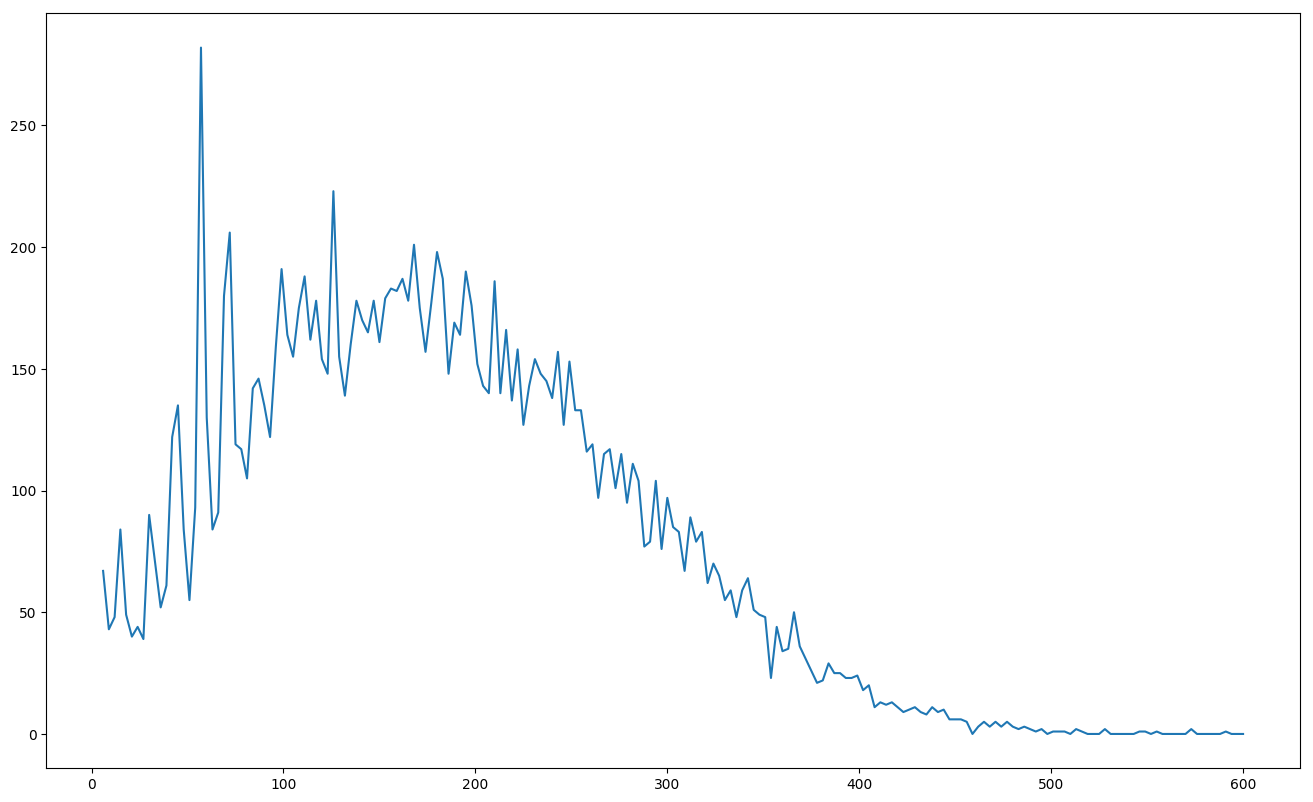

In [12]:
plt.plot(weight_2_bins[2:], weight_2_all_freq[1:])


In [5]:
def calculate_cb_weight_density_2(res_list, neighbor_list, min_seq_sep=2):
    weight_info = pd.read_csv("~/opt/parameters/amino_acid_side_chain_weight", comment="#", sep="\s+")
    weight_info["normalized_weight"] = weight_info["weight"] /(weight_info["weight"].min())
    weight_info["sideChainWeight"] = weight_info["weight"] - 56
    weight_info["normalized_weight_2"] =  (weight_info["sideChainWeight"]  /(weight_info["sideChainWeight"].min()))

    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):
                rij = get_interaction_distance(res1, res2)
                res2type = three_to_one(res2.get_resname())
                try:
                    # weight = float(weight_info.query(f"oneLetterCode == '{res2type}'")["normalized_weight"])
                    weight = float(weight_info.query(f"oneLetterCode == '{res2type}'")["normalized_weight_2"])
                except:
                    print(res2)
                    print(res2type)
                    print(weight_info.query(f"oneLetterCode == '{res2type}'")["normalized_weight"])
                density[res1globalindex] += weight*interaction_well(rij, 4.5, 6.5, 5)
    return density

In [100]:
parser = PDBParser()
all_freq = np.zeros(100)
largest = 20
all_ = []
for i, a in enumerate(a_list):
    structure = parser.get_structure("x", a)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    # sequence = get_sequence_from_structure(structure)
    cb_density = calculate_cb_density(res_list, neighbor_list)
    cb_density = np.clip(cb_density, 0, 10)
    cb_density_weight = calculate_cb_weight_density(res_list, neighbor_list)
    cb_density_weight_2 = calculate_cb_weight_density_2(res_list, neighbor_list)
    cb_density_weight_2 = np.clip(cb_density_weight, 0, 500)
    tmp =pd.DataFrame([cb_density, cb_density_weight, cb_density_weight_2]).T
    all_.append(tmp)
    freq, bins = np.histogram(cb_density, bins=100, range=(0,10))
    all_freq += freq
#     break
    if i == 10:
        break
data = pd.concat(all_)

In [102]:
data.columns = ["density", "weight_density", "weight_density_2"]

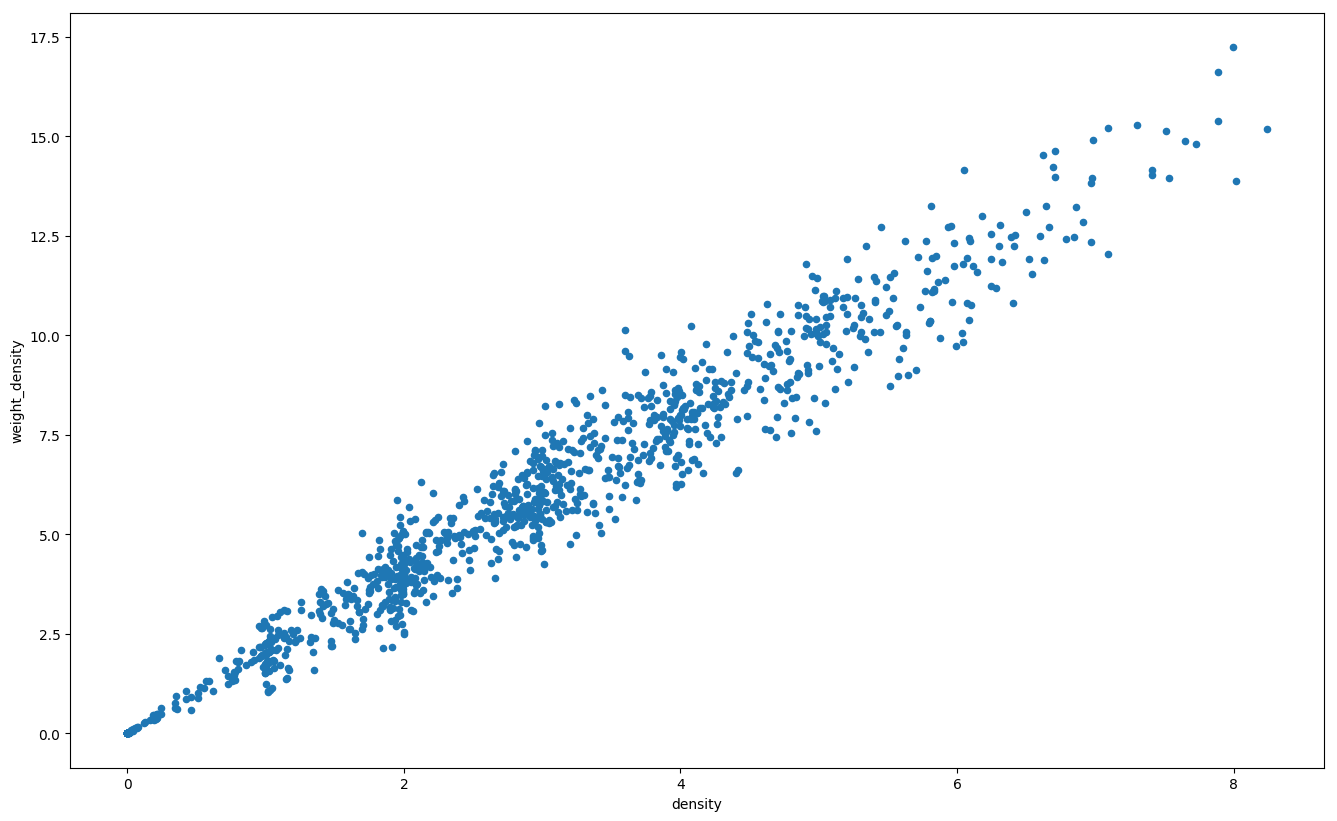

In [103]:
data.plot.scatter("density", "weight_density")

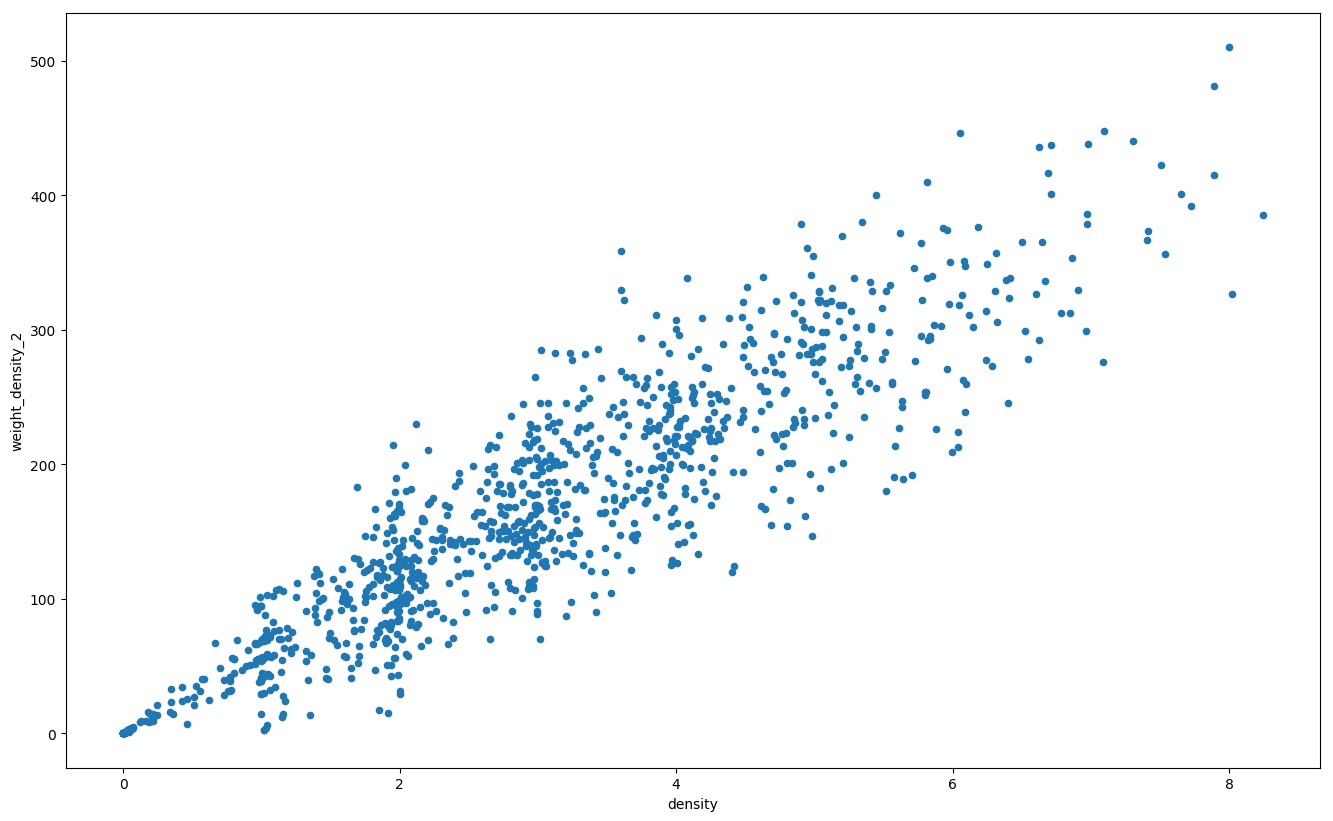

In [104]:
data.plot.scatter("density", "weight_density_2")

(array([66.,  8., 10.,  4.,  6.,  8., 10.,  9., 18.,  8., 26., 22., 10.,
        32., 12., 13., 14., 17., 20., 25., 20., 24., 22., 18., 23., 26.,
        19., 19., 33., 20., 25., 17., 21., 22., 17., 21., 19., 13., 21.,
        22., 12., 18., 21., 19., 25., 15., 14., 12., 17., 15., 15., 10.,
         7.,  7., 15., 14.,  9., 10., 11.,  8.,  8.,  8.,  9.,  9.,  9.,
         4.,  8.,  1.,  4.,  3.,  3.,  4.,  2.,  4.,  3.,  2.,  1.,  0.,
         3.,  0.,  1.,  2.,  1.,  0.,  0.,  3.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([3.74212048e-09, 5.10384723e+00, 1.02076945e+01, 1.53115417e+01,
        2.04153889e+01, 2.55192361e+01, 3.06230834e+01, 3.57269306e+01,
        4.08307778e+01, 4.59346250e+01, 5.10384723e+01, 5.61423195e+01,
        6.12461667e+01, 6.63500139e+01, 7.14538612e+01, 7.65577084e+01,
        8.16615556e+01, 8.67654028e+01, 9.18692501e+01, 9.69730973e+01,
        1.02076945e+02, 1.07180792e+02, 1.12284639e+02, 1.17388486e+02,
  

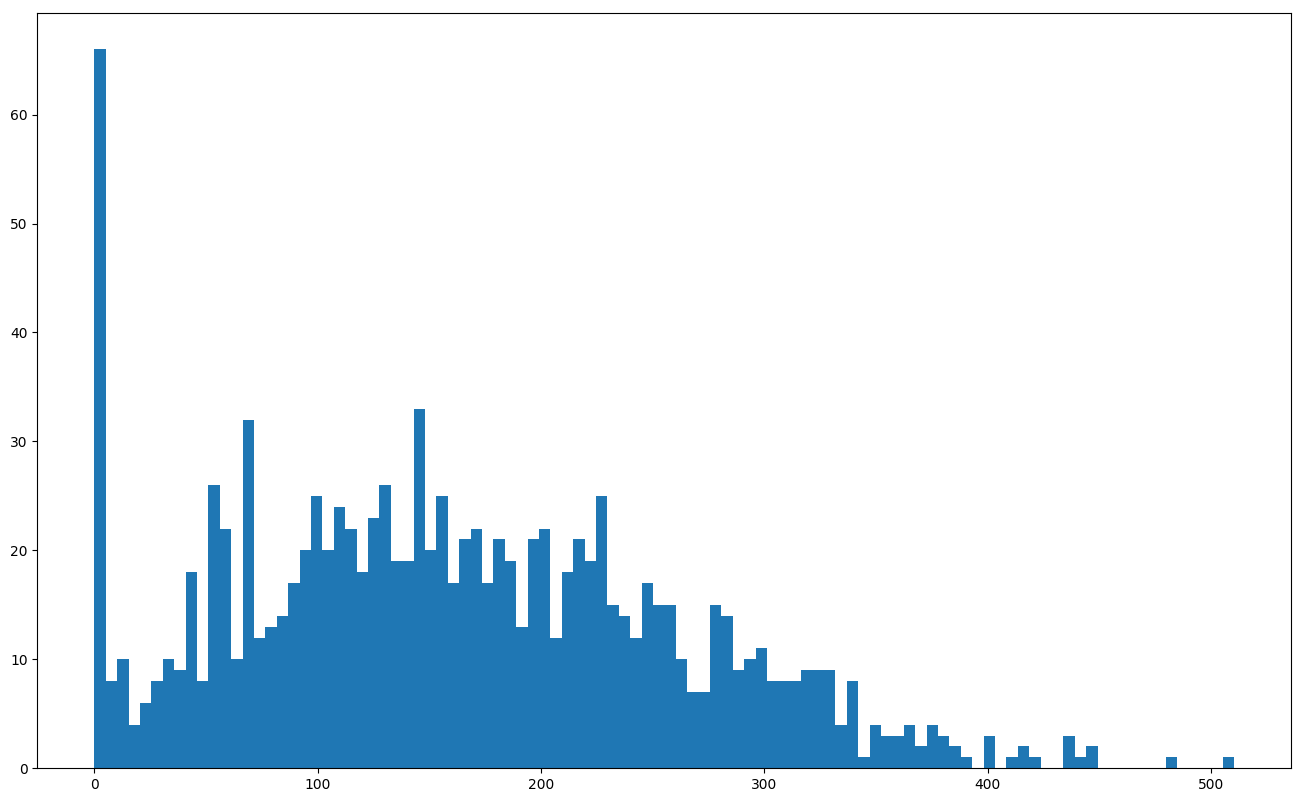

In [106]:
plt.hist(data["weight_density_2"],bins=100)

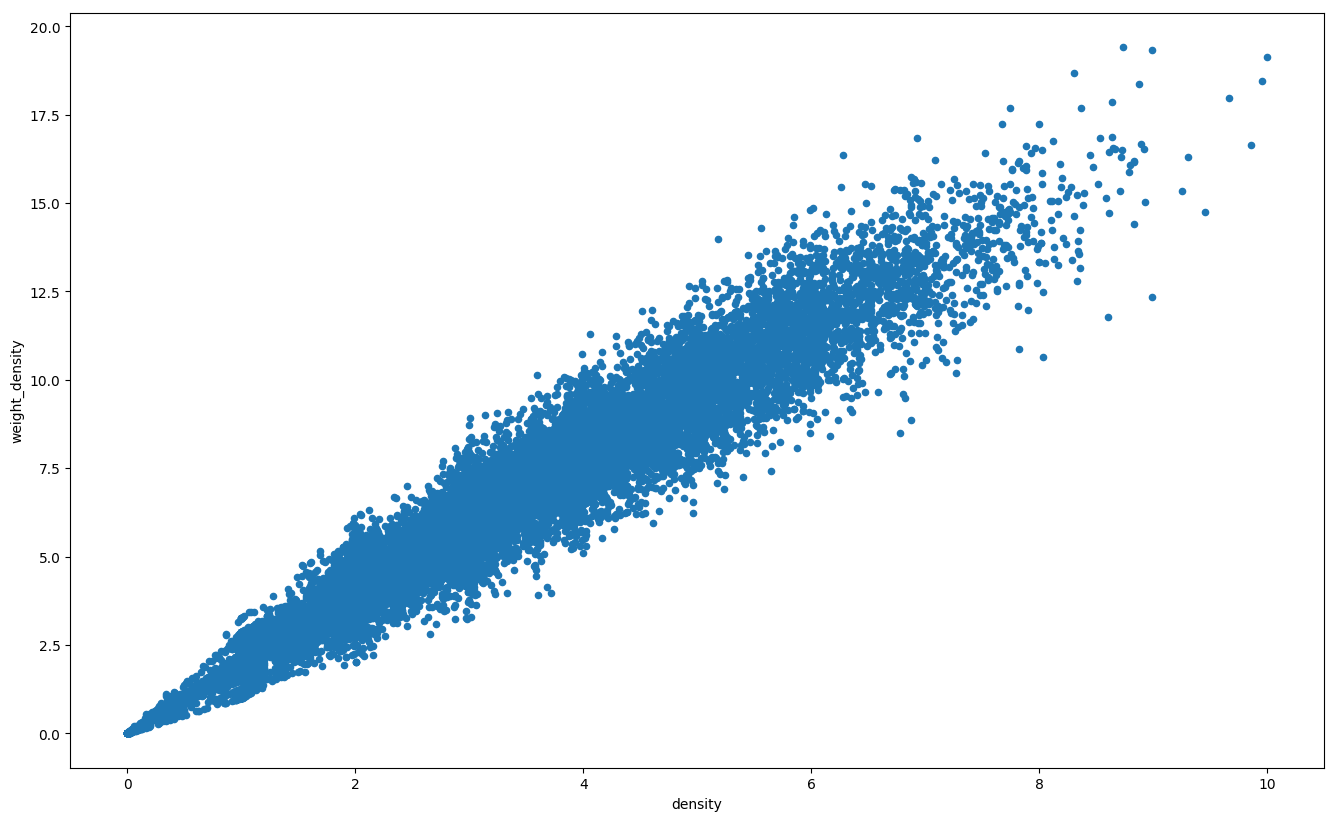

In [98]:
data.plot.scatter("density", "weight_density")

In [22]:
k_bin = 0.1
dz = np.linspace(-50,50)
y = 0.5*(1+np.tanh(k_bin*(dz-15)))

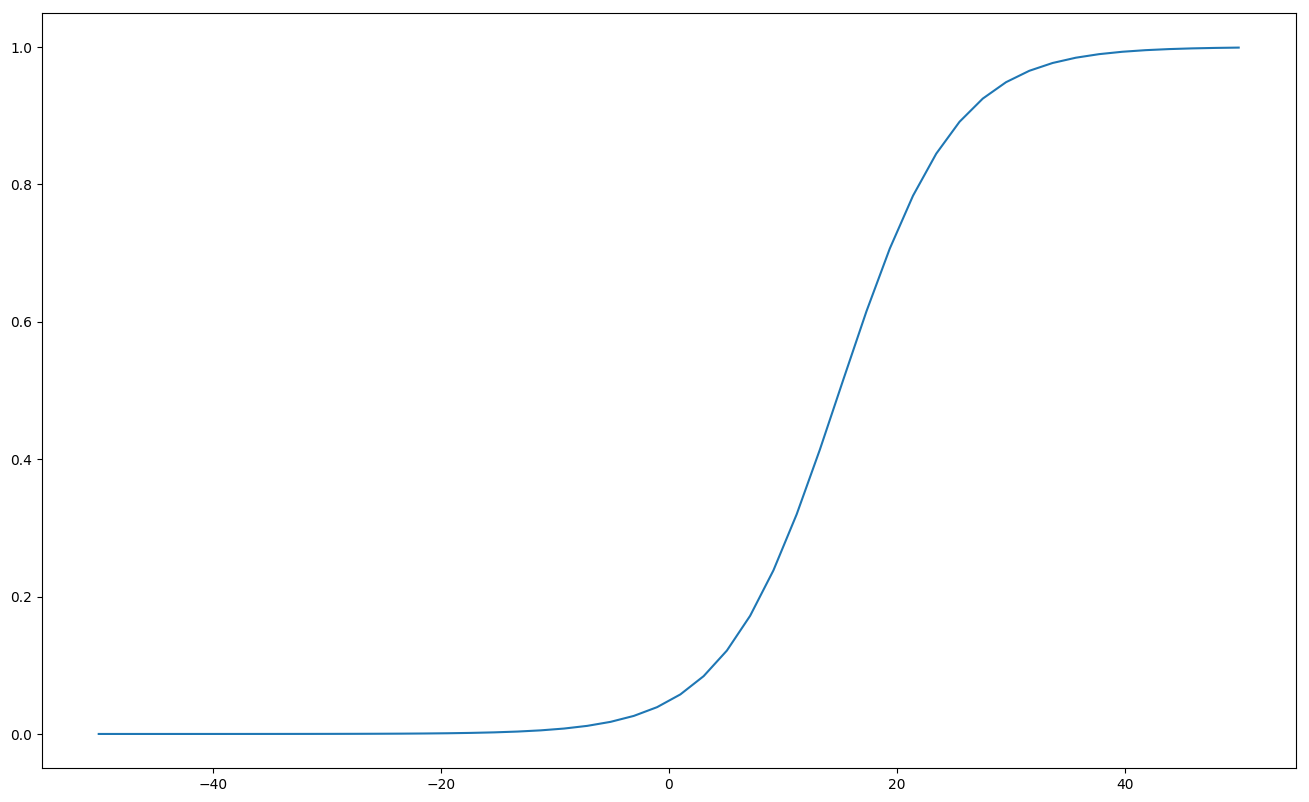

In [23]:
plt.plot(dz, y)

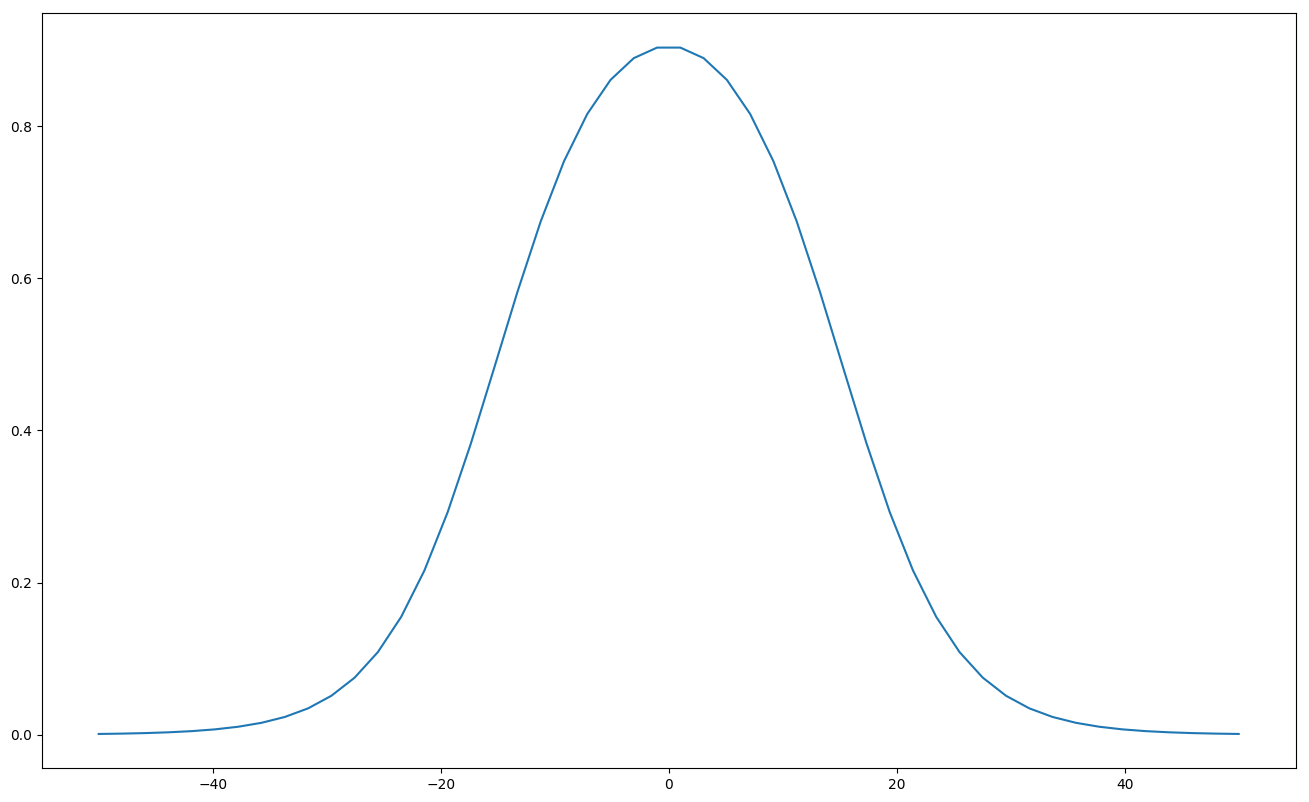

In [24]:
memb_b = 15
y = 0.5*((np.tanh(k_bin*(dz+memb_b)))+(np.tanh(k_bin*(memb_b-dz))))
plt.plot(dz, y)

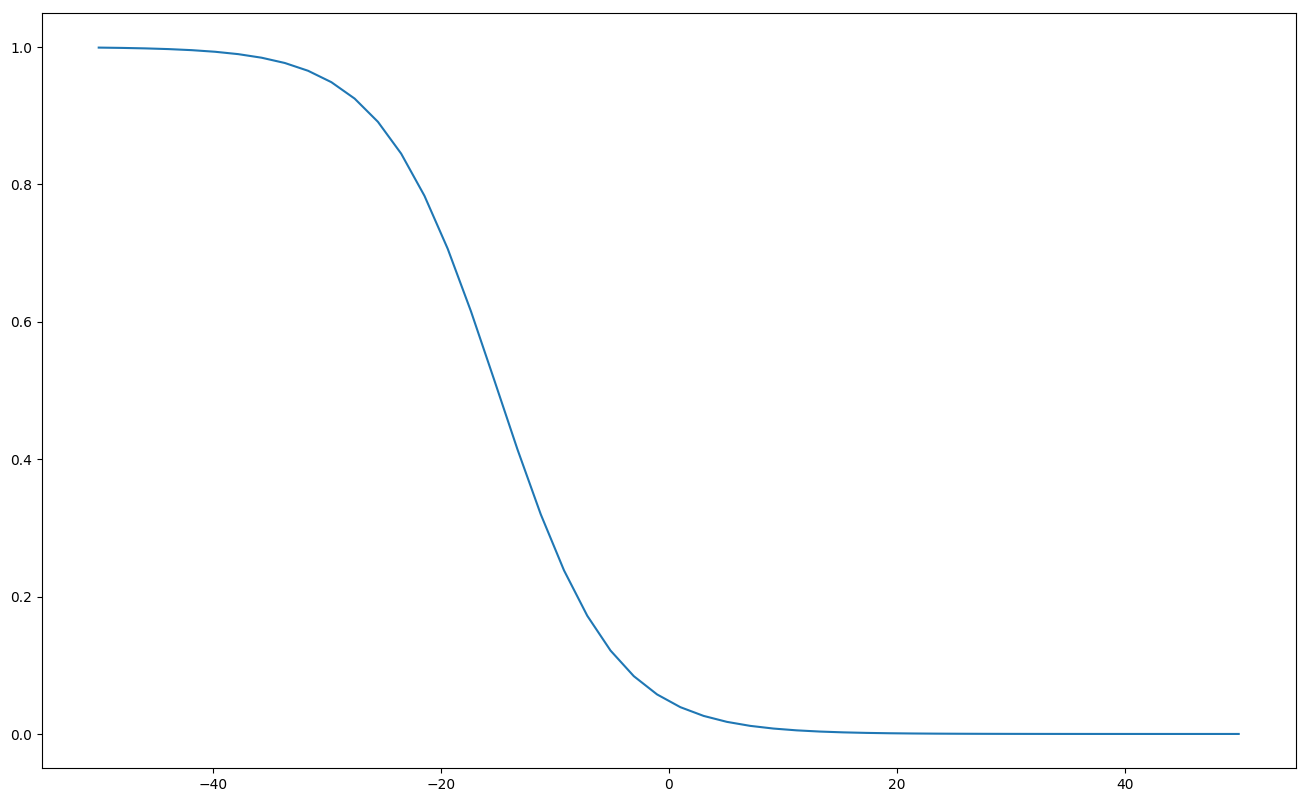

In [25]:
y = 0.5*(1+np.tanh(k_bin*(-memb_b-dz)))
plt.plot(dz, y)

In [88]:
tmp =pd.DataFrame([cb_density, cb_density_weight]).T

In [89]:
pd.concat([tmp,tmp])

,0,1
0,2.993022,4.727698
1,1.806508,3.814755
2,2.309954,4.959676
3,3.308095,6.645009
4,2.786939,5.509010
5,0.556119,1.127559
6,4.274126,8.589912
7,3.618283,7.625045
8,2.179394,5.045787
9,2.978000,5.743504


In [ ]:
values = numpy.arange(10, dtype=int)
bins = numpy.arange(-1, 11)
freq, bins = numpy.histogram(values, bins)

In [38]:
freq, bins = np.histogram([-1,1,11], bins=100, range=(0,10))

In [33]:
freq.shape

(100,)

In [41]:
all_freq

array([669.,  78.,  56.,  49.,  52.,  50.,  48.,  68., 101., 503., 523.,
       200., 125., 147., 140., 168., 168., 187., 263., 697., 567., 248.,
       217., 222., 213., 226., 216., 272., 345., 656., 459., 264., 274.,
       244., 240., 287., 263., 279., 366., 486., 341., 280., 210., 212.,
       196., 207., 209., 235., 266., 298., 240., 200., 170., 155., 119.,
       173., 151., 170., 150., 175., 130.,  92.,  84.,  76.,  82.,  59.,
        73.,  68.,  67.,  71.,  43.,  31.,  29.,  25.,  31.,  27.,  25.,
        22.,  24.,  14.,  11.,  11.,   7.,  12.,   2.,   3.,   7.,   6.,
         5.,   4.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,
         2.])

In [37]:
bins

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

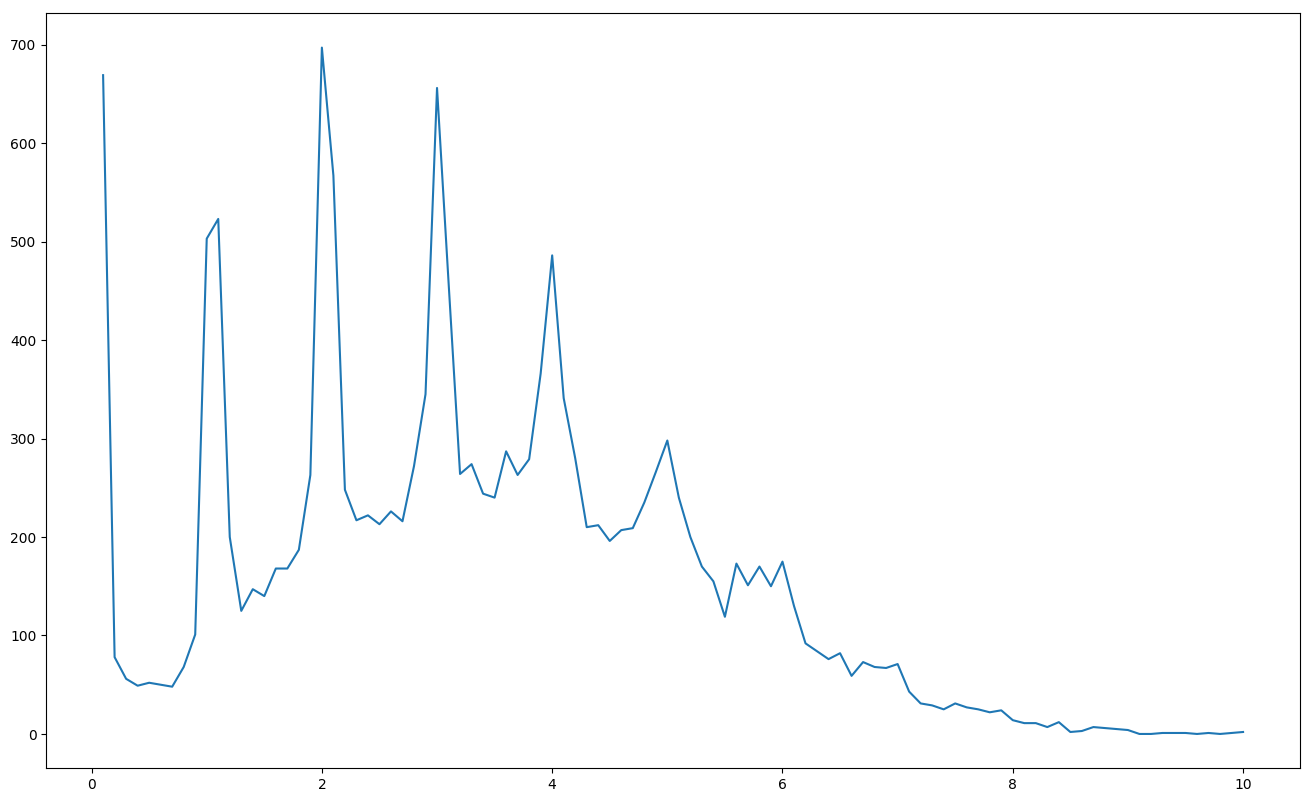

In [45]:
plt.plot(bins[1:], all_freq)


(2, 3)

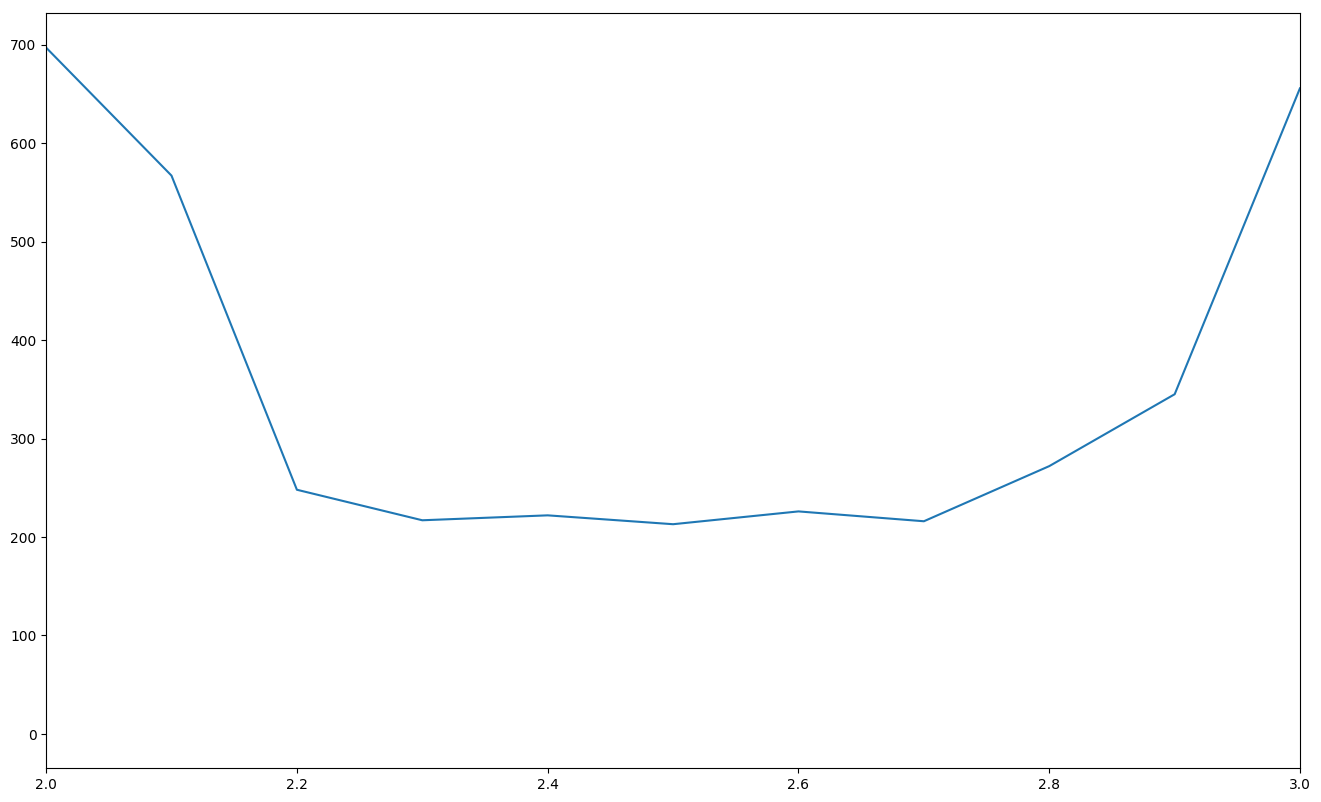

In [46]:
plt.plot(bins[1:], all_freq)
plt.xlim(2,3)

In [36]:
all_freq

array([669.,  78.,  56.,  49.,  52.,  50.,  48.,  68., 101., 503., 523.,
       200., 125., 147., 140., 168., 168., 187., 263., 697., 567., 248.,
       217., 222., 213., 226., 216., 272., 345., 656., 459., 264., 274.,
       244., 240., 287., 263., 279., 366., 486., 341., 280., 210., 212.,
       196., 207., 209., 235., 266., 298., 240., 200., 170., 155., 119.,
       173., 151., 170., 150., 175., 130.,  92.,  84.,  76.,  82.,  59.,
        73.,  68.,  67.,  71.,  43.,  31.,  29.,  25.,  31.,  27.,  25.,
        22.,  24.,  14.,  11.,  11.,   7.,  12.,   2.,   3.,   7.,   6.,
         5.,   4.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,
         1.])

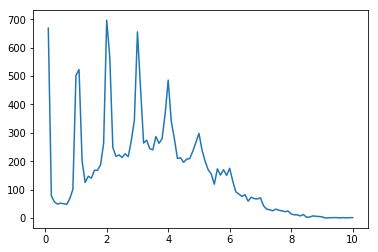

In [35]:
plt.plot(bins[1:], all_freq)

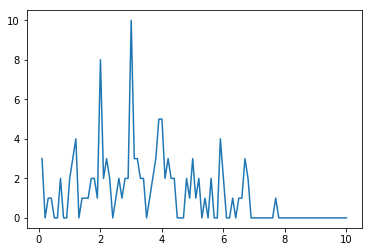

In [29]:
plt.plot(bins[1:], all_freq)

In [19]:
len(cb_density)

119

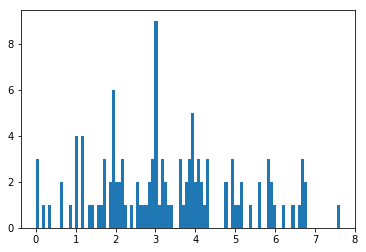

In [12]:
_ = plt.hist(cb_density, bins=100)

In [ ]:
fileName = "/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/phi_figures/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_phi_decoy_summary.txt"
a = np.loadtxt(fileName)
np.savetxt("/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/phi_figures/log_decoy.txt", np.log(a))

fileName = "/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/phi_figures/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_phi_native_summary.txt"
a = np.loadtxt(fileName)
np.savetxt("/Users/weilu/Research/server/feb_2020/cath_dataset_shuffle_optimization/phi_figures/log_native.txt", np.log(a))